In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


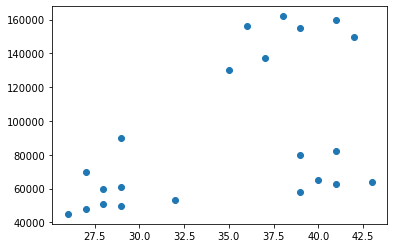

In [3]:
plt.scatter(df['Age'], df['Income'])

In [5]:
km = KMeans(n_clusters=3)
km

KMeans(n_clusters=3)

In [6]:
y_pred = km.fit_predict(df[['Age', 'Income']])
y_pred

array([1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2])

In [7]:
df['cluster'] = y_pred
df.head()

,Name,Age,Income,cluster
0,Rob,27,70000,1
1,Michael,29,90000,1
2,Mohan,29,61000,2
3,Ismail,28,60000,2
4,Kory,42,150000,0


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


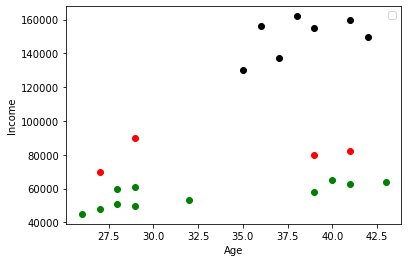

In [9]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0.Age, df0['Income'], color='black')
plt.scatter(df1.Age, df1['Income'], color='red')
plt.scatter(df2.Age, df2['Income'], color='green')
# plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', linewidths='centroid')

plt.xlabel('Age')
plt.ylabel('Income')   
plt.legend()

In [12]:
scaler = MinMaxScaler()
scaler.fit(df[['Income']])
df['Income']= scaler.transform(df[['Income']])
scaler.fit(df[['Age']])
df['Age']= scaler.transform(df[['Age']])
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [14]:
km = KMeans(n_clusters=3)
y_pred = km.fit_predict(df[['Age', 'Income']])
y_pred

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [16]:
df['cluster'] = y_pred
df

,Name,Age,Income,cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


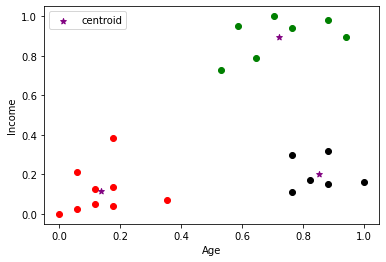

In [21]:
df0 = df[df.cluster == 0]
df1 = df[df.cluster == 1]
df2 = df[df.cluster == 2]

plt.scatter(df0.Age, df0['Income'], color='black')
plt.scatter(df1.Age, df1['Income'], color='red')
plt.scatter(df2.Age, df2['Income'], color='green')
plt.scatter(km.cluster_centers_[:,0], km.cluster_centers_[:,1], color='purple', marker='*', label='centroid')

plt.xlabel('Age')
plt.ylabel('Income')   
plt.legend()

In [18]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [22]:
# Elbow method
k_range = range(1,10)
see = []
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income']])
    see.append(km.inertia_)

c:\Users\kalgh\anaconda3\envs\tf\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [23]:
see

[5.434011511988176,
 2.0911363886990766,
 0.4750783498553095,
 0.3491047094419565,
 0.2664030124668415,
 0.21066678488010518,
 0.1729962193245546,
 0.1400004469866653,
 0.11635479973101598]

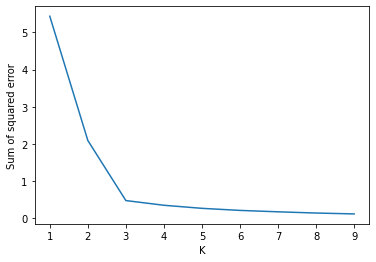

In [24]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range, see)